## Reproducing Napoleon's March visualization

Following and using data from Hadley Wickham's *Layered Grammar of Graphics*
- [publication with data in supplemental material](https://www.tandfonline.com/doi/abs/10.1198/jcgs.2009.07098)
- [downloadable prepring article](http://vita.had.co.nz/papers/layered-grammar.html)

In [1]:
import pandas as pd
import altair as alt

In [2]:
troops = pd.read_csv('data/LayeredGrammarOfGraphics/minard-troops.txt', delim_whitespace=True)
troops.head()

,long,lat,survivors,direction,group
0,24.0,54.9,340000,A,1
1,24.5,55.0,340000,A,1
2,25.5,54.5,340000,A,1
3,26.0,54.7,320000,A,1
4,27.0,54.8,300000,A,1


In [3]:
cities = pd.read_csv('data/LayeredGrammarOfGraphics/minard-cities.txt', delim_whitespace=True)
cities.head()

,long,lat,city
0,24.0,55.0,Kowno
1,25.3,54.7,Wilna
2,26.4,54.4,Smorgoni
3,26.8,54.3,Moiodexno
4,27.7,55.2,Gloubokoe


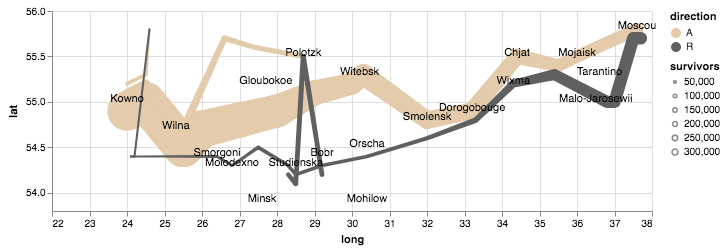

In [4]:
width = 600
height = 200

labels = alt.Chart(cities).mark_text().encode(
    x = alt.X('long:Q', scale=alt.Scale(zero=False)),
    y = alt.Y('lat:Q', scale=alt.Scale(zero=False)),
    text = 'city:N'
).properties(
    width = width,
    height = height
)

dir_domain = ['A', 'R']
dir_rng = ['#E3CBAB', '#606060']

path = alt.Chart(troops).mark_trail().encode(
    x = alt.X('long:Q', scale=alt.Scale(domain=[23,38], zero=False)),
    y = alt.Y('lat:Q', scale=alt.Scale(domain=[53.8,56], zero=False)),
    size = alt.Size('survivors:Q', scale=alt.Scale(domain=[50000,300000], range=[7,35])),
    color = alt.Color('direction:N', scale=alt.Scale(domain=dir_domain, range=dir_rng)),
    detail = 'group:N'
).properties(
    width = width,
    height = height
)

path + labels